# **Faricha Aulia ✨**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).**


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img_jokowi = cv2.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
img_kartini = cv2.imread('/content/drive/MyDrive/Images/facedet/kartini.jpg')
img_cat = cv2.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
img_mask = cv2.imread('/content/drive/MyDrive/Images/facedet/mask.png')
img_jordan = cv2.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
img_solvayconf = cv2.imread('/content/drive/MyDrive/Images/facedet/solvayconf.jpg')

images = [img_jokowi,img_kartini,img_kucing,img_mask,img_jordan,img_solvayconf]

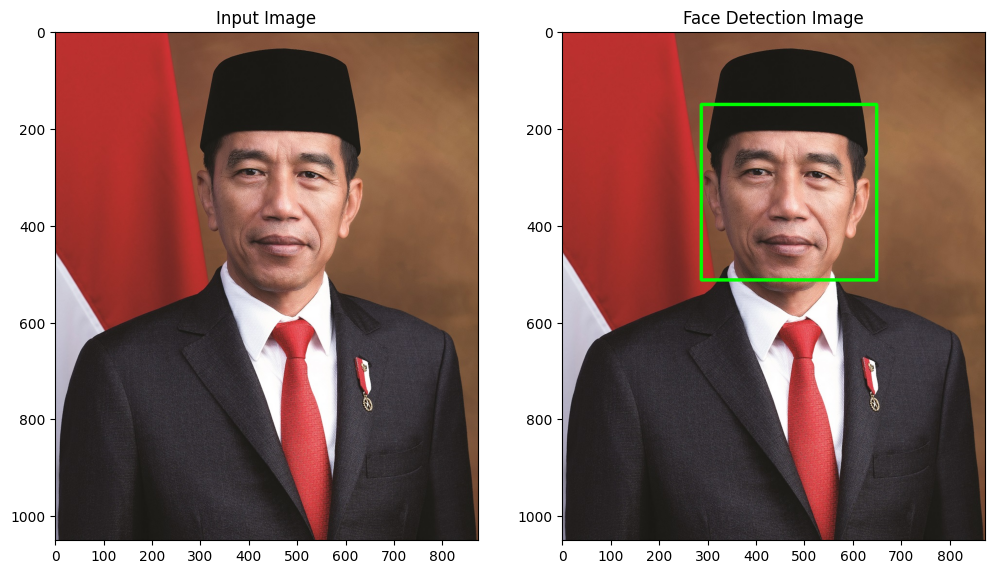

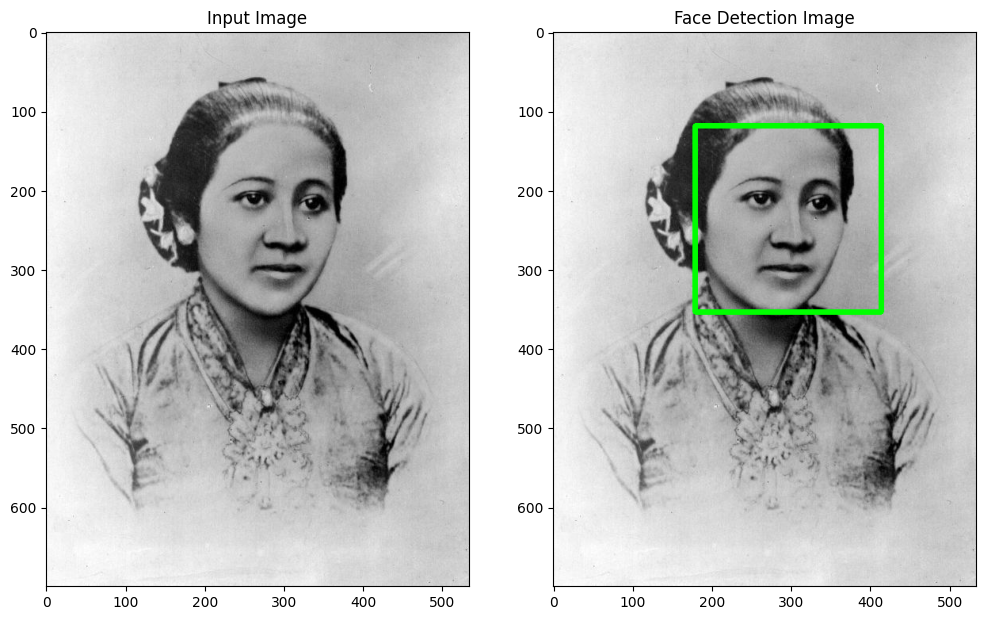

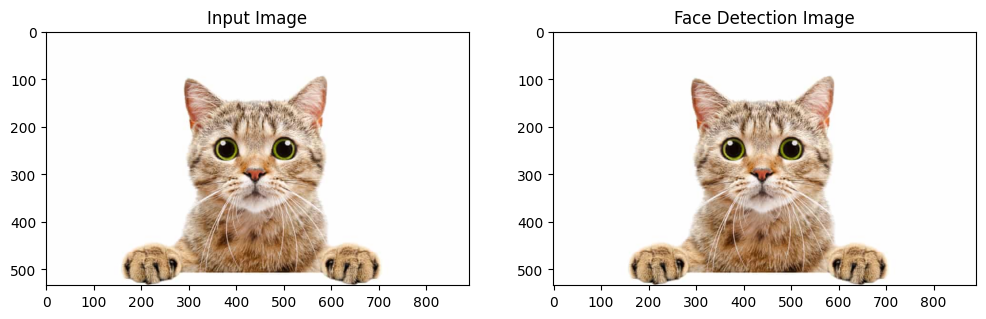

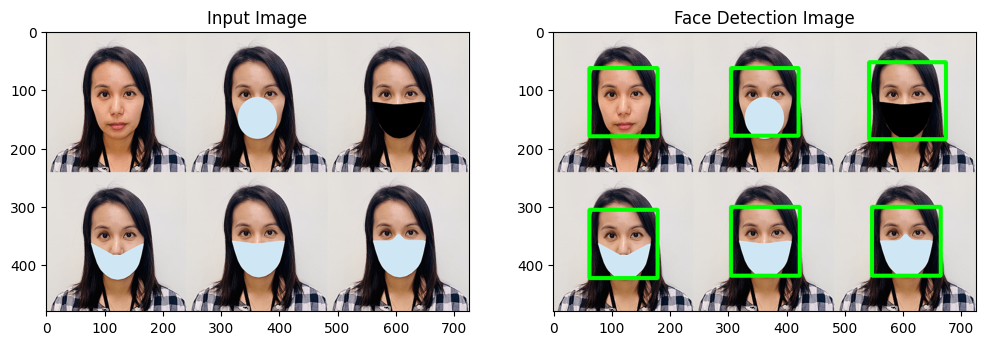

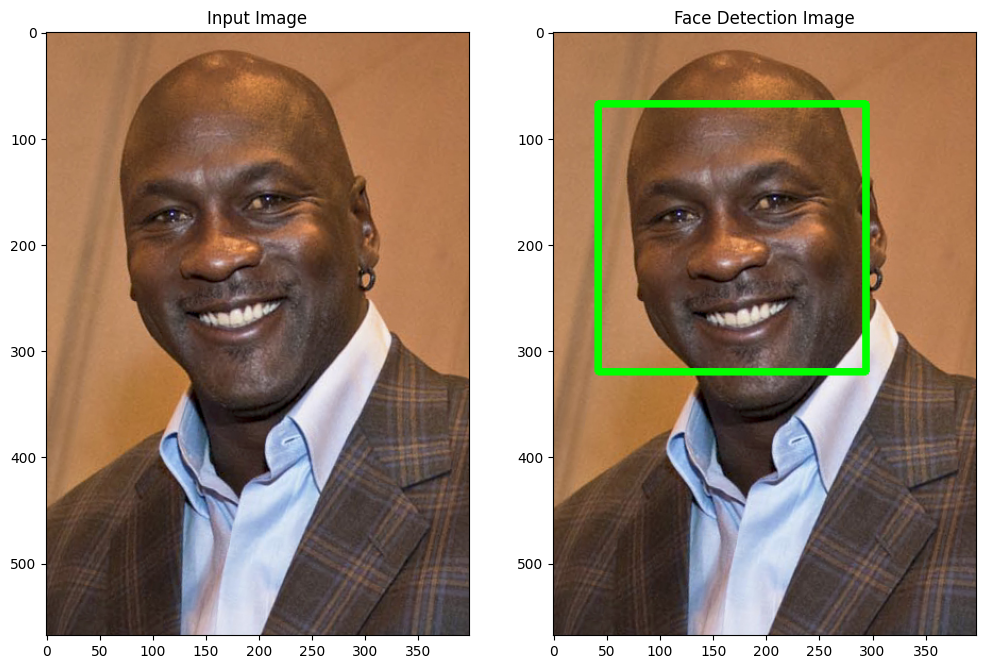

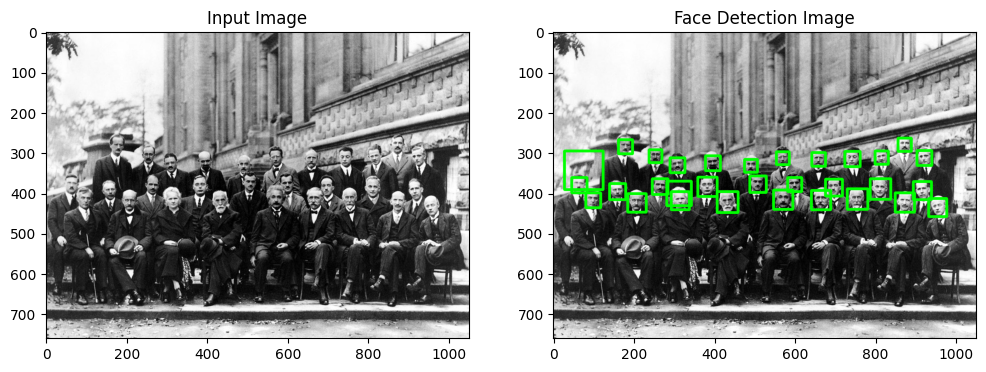

In [ ]:
# Load the Haar Cascade
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Parameters
min_neighbors = [5, 5, 2, 2, 5, 3]
scale_factors = [1.2, 1.2, 1.6, 1.2, 1.6, 1.1]

# Loop
for i, img in enumerate(images):
    facedet_img = img.copy()
    faces_rects = haar_cascade.detectMultiScale(img, scaleFactor=scale_factors[i], minNeighbors=min_neighbors[i])

    for (x, y, w, h) in faces_rects:
        cv2.rectangle(facedet_img, (x, y), (x+w, y+h), (0, 255, 0), 5)

    plt.figure(figsize=(12, 8))
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
    plt.subplot(122), plt.imshow(cv2.cvtColor(facedet_img, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Face Detection Image')

plt.show()

### **2. Pada Soal No.1. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines**

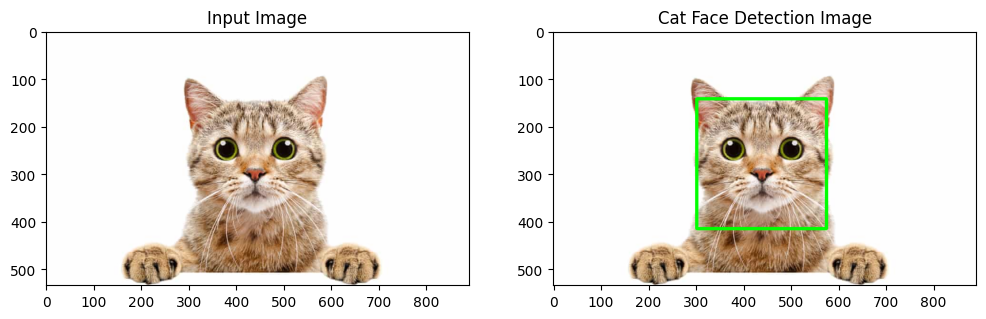

In [ ]:
# Load the Haar Cascade for cat face detection
cat_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')

# Copy cat image
fd_cat = img_cat.copy()

# Detect cat faces
cat_rects = cat_cascade.detectMultiScale(fd_cat, scaleFactor=1.5, minNeighbors=2)

# Draw rectangles
for (x, y, w, h) in cat_rects:
    cv2.rectangle(fd_cat, (x, y), (x+w, y+h), (0, 255, 0), 5)

# Plot the images
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(fd_cat, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Cat Face Detection Image')

plt.show()

### **3. Cobakan juga untuk eyes detection**

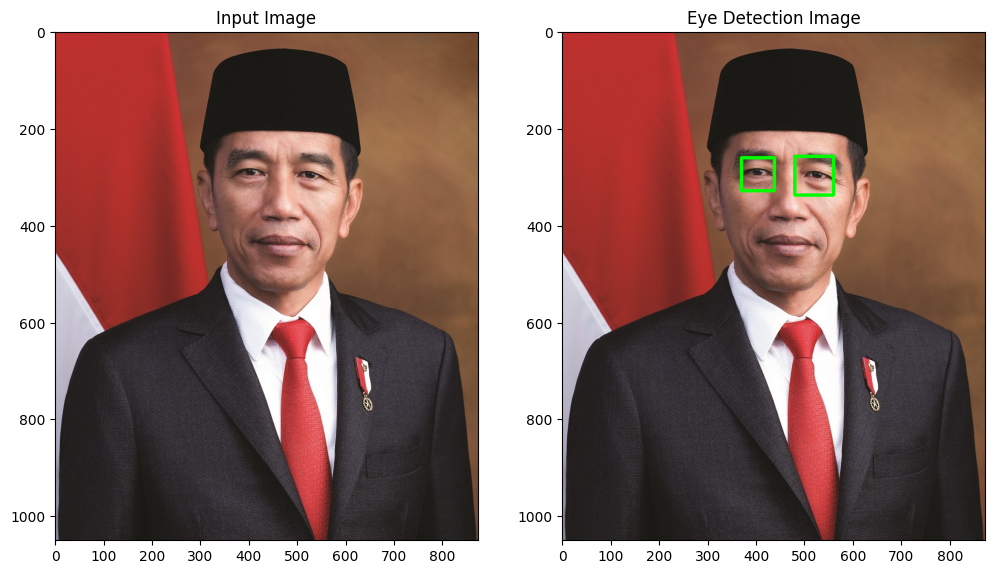

In [ ]:
# Load the Haar Cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Copy the input image of Jokowi
fd_eye = img_jokowi.copy()

# Detect eyes in the image
eye_rects = eye_cascade.detectMultiScale(fd_eye, scaleFactor=1.2, minNeighbors=5)

# Draw rectangles around the detected eyes
for (x, y, w, h) in eye_rects:
    cv2.rectangle(fd_eye, (x, y), (x+w, y+h), (0, 255, 0), 5)

# Plot the original and eye detection images side by side
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(img_jokowi, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(fd_eye, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Eye Detection Image')

plt.show()

### **4. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60**

In [ ]:
# Import
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL.Image
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
    """
    Convert JavaScript object containing an image from a webcam to an OpenCV BGR image.

    Params:
        js_reply: JavaScript object containing image from webcam
    Returns:
        img: OpenCV BGR image
    """
    # Decode
    image_bytes = b64decode(js_reply.split(',')[1])
    # Convert array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # Decode image
    img = cv2.imdecode(jpg_as_np, flags=1)

    return img

def bbox_to_bytes(bbox_array):
    """
    Convert OpenCV rectangle bounding box image into base64 byte string to be overlayed on the video stream.

    Params:
        bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
    Returns:
        bytes: Base64 image byte string
    """
    # Convert array into PIL image
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    # Format bbox into png for return
    bbox_PIL.save(iobuf, format='png')
    # Format return string
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

    return bbox_bytes

In [ ]:
# Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # get OpenCV format image
    img = js_to_image(data)
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    print(gray.shape)

    # get face bounding box coordinates using Haar Cascade
    faces = face_cascade.detectMultiScale(gray)

    # draw face bounding box on image
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # save image
    cv2.imwrite(filename, img)

    return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


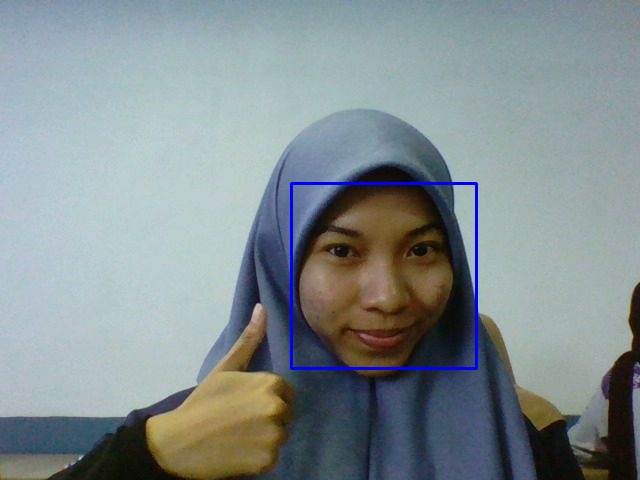

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### **5. Lakukan Blurring pada bagian wajah yang terdeteksi. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring**

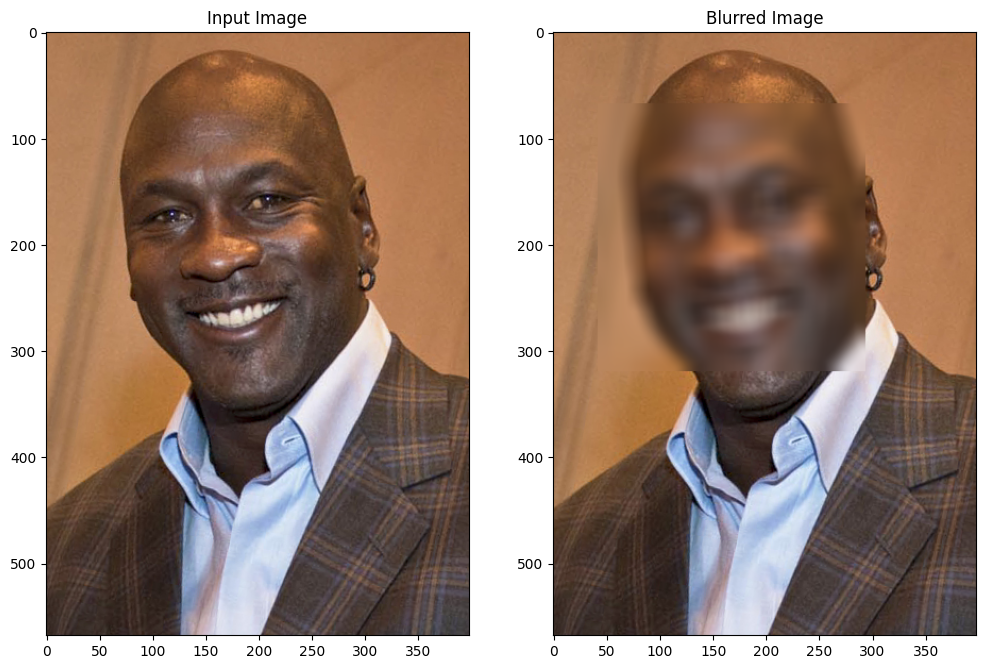

In [ ]:
# Load the Haar Cascade for face detection
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Copy image
blurred = img_jordan.copy()

# Detect image
jordan_rects = haar_cascade.detectMultiScale(img_jordan, scaleFactor=1.6, minNeighbors=5)

# Apply Gaussian blur
for (x, y, w, h) in jordan_rects:
    roi = blurred[y:y+h, x:x+w]
    roi = cv2.GaussianBlur(roi, (21, 21), 30)
    blurred[y:y+h, x:x+w] = roi

# Plot the images side by side
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(img_jordan, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Blurred Image')

plt.show()

### **6. Lakukan segmentasi karakter pada KTP**

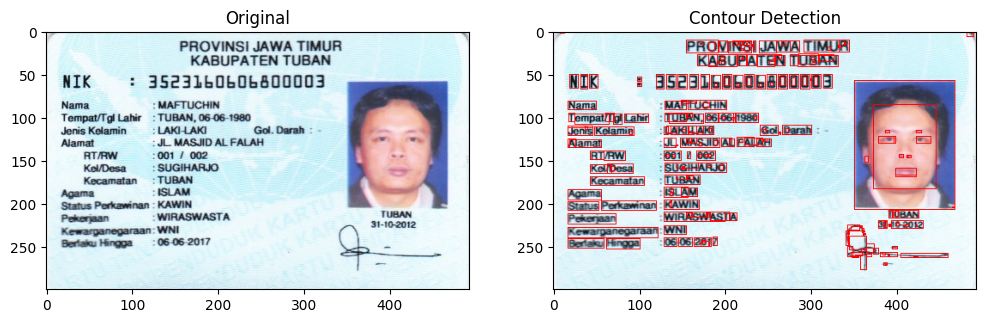

In [ ]:
# Read the image
ktp_maftuchin = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')

# Convert
ktp = cv2.cvtColor(ktp_maftuchin, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(ktp, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blur_ktp = cv2.GaussianBlur(gray, (3, 3), 1)

# Apply thresholding
ret, thresh = cv2.threshold(blur_ktp, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Create a copy
detected = ktp.copy()

# Canny edge
edged = cv2.Canny(thresh, 16, 16)

# Find contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Plot the images side by side
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(ktp, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(detected, cmap='gray'), plt.title('Contour Detection')

plt.show()

### **7. Lakukan cropping pada bagian NIK saja**

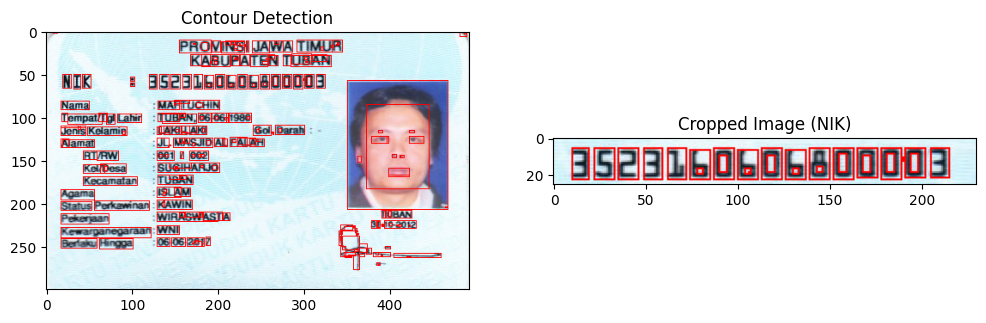

In [ ]:
# Manually crop the NIK
ktp_crop = detected[45:70, 110:340].copy()

# Plot the image
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(detected, cmap='gray'), plt.title('Contour Detection')
plt.subplot(122), plt.imshow(ktp_crop, cmap='gray'), plt.title('Cropped Image (NIK)')

plt.show()

### **8. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.**


In [ ]:
!sudo apt install tesseract-ocr
%pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,665 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

Hasil deteksi pytesseract: 352316006800003



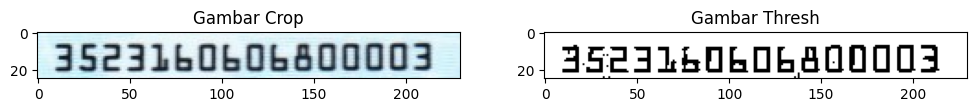

In [ ]:
# Crop the region of interest (ROI)
ktp_crop = ktp[45:70, 110:340].copy()
gray = cv2.cvtColor(ktp_crop, cv2.COLOR_RGB2GRAY)

# Define a kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

# Apply
sharpen = cv2.filter2D(gray, -1, kernel)
opened = cv2.morphologyEx(sharpen, cv2.MORPH_OPEN, (3, 3))

# Thresholding
ret, thresh = cv2.threshold(opened.copy(), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tesseract OCR config
custom_config = r'--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789'
results = pytesseract.image_to_string(ktp_crop, config=custom_config)

# Display
print(f'Hasil deteksi pytesseract: {results}')
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(ktp_crop, cmap='gray'), plt.title('Gambar Crop')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.title('Gambar Thresh')
plt.show()

In [ ]:
from keras import layers, models,optimizers,datasets,utils,losses
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

y_train_cat = utils.to_categorical(y_train,10)
y_test_cat = utils.to_categorical(y_test,10)

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Display shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

# Get unique labels
unique_labels = np.unique(y_test)
print("Unique labels in the test set:", unique_labels)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Unique labels in the test set: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Create model
model = models.Sequential()

# Add layers
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output
model.add(layers.Flatten())

# Add dense
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(unique_labels)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [ ]:
# Compile the model
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1875/1875 [==============================] - 24s 6ms/step - loss: 0.1493 - accuracy: 0.9530 - val_loss: 0.0451 - val_accuracy: 0.9850
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0392 - val_accuracy: 0.9870
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9914
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0376 - val_accuracy: 0.9888
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0331 - val_accu

In [ ]:
model.save('anpr.model')

Detected: 16


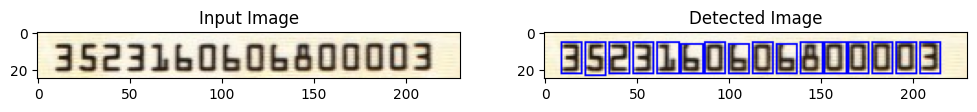

In [ ]:
# Crop roi
ktp_crop = ktp[45:70, 110:340].copy()

gray = cv2.cvtColor(ktp_crop, cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Morphological opening
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles
detected = ktp_crop.copy()
nums = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if 10 <= w <= 20:
        cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)
        num = ktp_crop[y:y+h, x:x+w].copy()
        nums.append(num)

print(f'Detected: {len(nums)}')

# Display images
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(ktp_crop, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Detected Image')

plt.show()

1/1 [==============================] - 0s 21ms/step


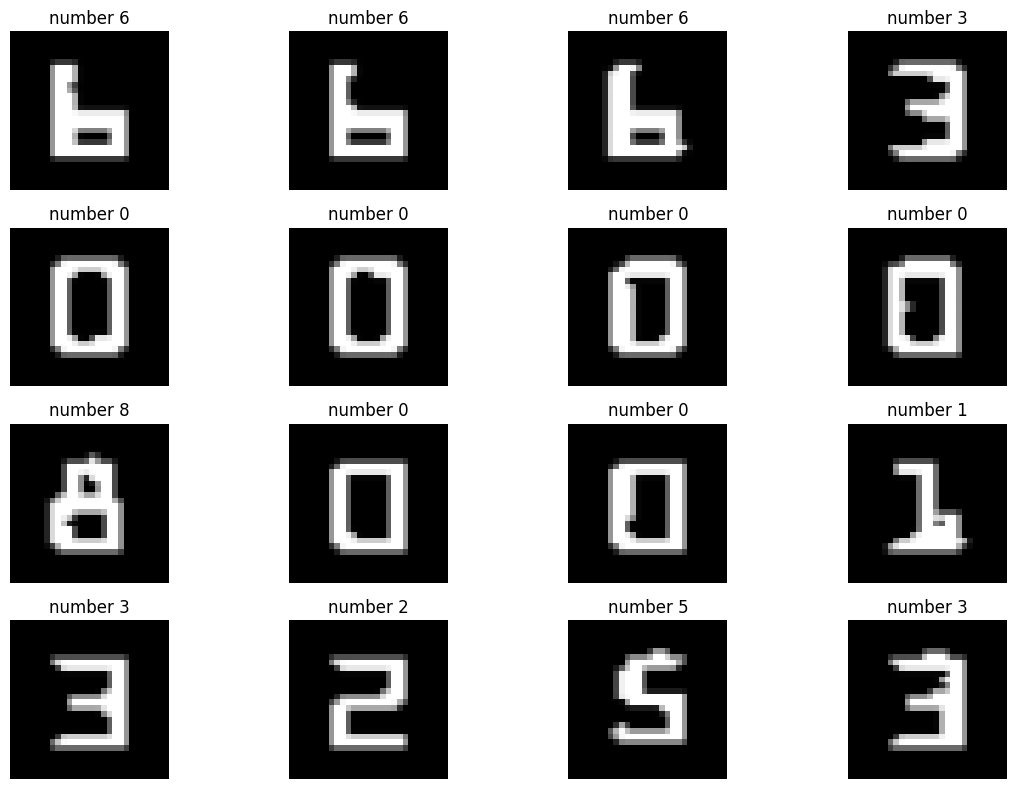

In [ ]:
from sklearn.decomposition import PCA

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 8))

# Iterate
for i, num in enumerate(nums):
    # Preprocess
    num = cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(num, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    top, bottom, left, right = 4, 4, 4, 4
    num = cv2.copyMakeBorder(thresh, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    num = cv2.resize(num, (28, 28))
    num = np.array(num)
    num = num / 255.0
    # PCA
    num_vector = num.reshape((-1, 1))
    pca = PCA(n_components=1)
    num_pca = pca.fit_transform(num_vector)
    num_upscaled = num_pca.reshape(-1, 28, 28, 1)
    # Make predictions
    pred = model.predict(num_upscaled)
    pred = np.argmax(pred)
    # Display the image and prediction
    axes[i // 4, i % 4].imshow(num_upscaled.reshape(num.shape), cmap='gray')
    axes[i // 4, i % 4].set_title(f'number {pred}')
    axes[i // 4, i % 4].axis('off')

# Display
plt.tight_layout()
plt.show()